<a href="https://colab.research.google.com/github/KangnamUniv-ML/Titanic-ML/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip3 install kaggle

# Titanic 데이터 정보

| column | descript | val |
|--------|----------|-----|
|survival|	Survival|	0 = No, 1 = Yes|
|pclass	|Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex	|Sex	||
|Age	|Age in years| |
|sibsp	|# of siblings / spouses aboard the Titanic	| |
|parch	|# of parents / children aboard the Titanic	| |
|ticket	|Ticket number	| |
|fare	|Passenger fare	| |
|cabin	|Cabin number	| |
|embarked|	Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton|

## 참고 레퍼런스

- [kaggle API 사용법](https://velog.io/@skyepodium/Kaggle-API-%EC%82%AC%EC%9A%A9%EB%B2%95)

## python 라이브러리 import, 학습 데이터 다운로드

In [158]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 닉네임, 토큰 설정
# os.environ["KAGGLE_USERNAME"] = ''
# os.environ["KAGGLE_KEY"] = ""

# 데이터 받기, colab에서 리눅스 명령어를 사용할때는 앞에 !가 붙습니다.
!kaggle competitions download -c titanic

  0%|                                               | 0.00/34.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 8.61MB/s]


In [122]:
!unzip -o titanic.zip
!rm titanic.zip
!ls -al

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
total 180
drwxr-xr-x 7 jovyan users   224 May 21 01:39 .
drwsrwsr-x 1 jovyan users  4096 May 18 10:41 ..
-rw-r--r-- 1 jovyan users  3258 Dec 11  2019 gender_submission.csv
drwxr-xr-x 3 jovyan users    96 May 18 10:43 .ipynb_checkpoints
-rw-r--r-- 1 jovyan users 28629 Dec 11  2019 test.csv
-rw-r--r-- 1 jovyan users 78641 May 21 01:38 Titanic.ipynb
-rw-r--r-- 1 jovyan users 61194 Dec 11  2019 train.csv


## 학습 데이터 로드

In [123]:
df = pd.read_csv('./train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## 자료 구조 파악

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [126]:
df.index

RangeIndex(start=0, stop=891, step=1)

- Null 데이터 확인

Age, Cabin, Embarked 컬럼이 null 값 존재

In [127]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

`describe` 명령을 통해 데이터 간략 통계정보 확인

In [128]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 데이터 전처리 작업 진행

전처리 목표

- Age 컬럼의 null 값 항목에 가능하면 평균값으로 채워 놓자 <-- 해당 row 를 삭제하기엔 데이터가 너무 적음
- Embarked 컬럼의 null 값 부분은 최빈값으로 채워놓자 <-- 해당 row 를 삭제하기엔 데이터가 너무 적음
- Name, Ticket, Cabin 컬럼은 의미도 없어 보이고 데이터도 많이 빠진것도 있으니 컬럼자체를 삭제하자
- sex, Embarked 컬럼은 `one hot encoding` 을 하거나 문자열 값을 숫자로 변환하자

### Age 컬럼의 null 값 항목에 가능하면 평균값으로 채워 놓자

In [129]:
math.floor(df['Age'].mean())

29

[loc reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)

`Age` 컬럼 중 null 인 부분만 골라낸 boolean array 값을 `loc`을 이용해 추출된 row 그룹을 반환

그 중 `Age` column 만 추출한 결과에 평균 값을 저장

In [130]:
df.loc[df['Age'].isnull(), 'Age'] = math.floor(df['Age'].mean())

In [131]:
df['Age'].isnull().sum()

0

### Embarked 컬럼의 null 값 부분은 최빈값으로 채워놓자

[unique reference](https://pandas.pydata.org/docs/reference/api/pandas.unique.html)

In [132]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

[mode reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html)

최빈값은 검색한 결과 `S`로 확인 됨

In [133]:
df['Embarked'].mode()[0]

'S'

In [134]:
df.loc[df['Embarked'].isnull(), 'Embarked'] = df['Embarked'].mode()[0]

In [135]:
df['Embarked'].isnull().sum()

0

`Age`, `Embarked`의 null 값을 처리했음을 확인할 수 있음

In [136]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Name, Ticket, Cabin 컬럼은 의미도 없어 보이고 데이터도 많이 빠진것도 있으니 컬럼자체를 삭제하자

In [137]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [138]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Sex, Embarked 컬럼은 one hot encoding 을 하거나 문자열 값을 숫자로 변환하자

In [139]:
sexDummies = pd.get_dummies(df['Sex'])
embarkedDummies = pd.get_dummies(df['Embarked'])

In [140]:
sexDummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [141]:
embarkedDummies.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [142]:
df = pd.concat([df, sexDummies, embarkedDummies], axis=1)
df = df.drop(['Sex', 'Embarked'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


## 시각화

https://stackoverflow.com/questions/11869910/pandas-filter-rows-of-dataframe-with-operator-chaining

## 성별에 따른 생존률

In [143]:
# len(df[(df['female'] == 1) & (df['Survived'] == 1)])

survivedGender = df[df['Survived'] == 1][['female', 'male']]
survivedGender.head()

,female,male
1,1,0
2,1,0
3,1,0
8,1,0
9,1,0


In [144]:
deadGender = df[df['Survived'] == 0][['female', 'male']]
deadGender.head()

,female,male
0,0,1
4,0,1
5,0,1
6,0,1
7,0,1


<AxesSubplot:>

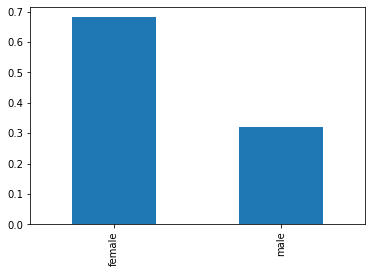

In [145]:
survivedGender.mean().plot(kind='bar')

<AxesSubplot:>

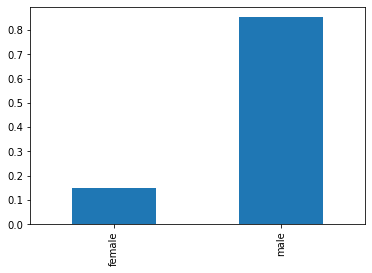

In [146]:
deadGender.mean().plot(kind='bar')

## Pclass 에 따른 생존률

In [147]:
survivedPclass = df[df['Survived'] == 1][['Pclass']]
survivedPclass.value_counts()

Pclass
1         136
3         119
2          87
dtype: int64

<AxesSubplot:xlabel='Pclass'>

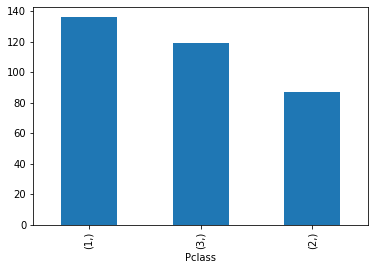

In [148]:
survivedPclass.value_counts().plot(kind='bar')

In [149]:
deadPclass = df[df['Survived'] == 0][['Pclass']]
deadPclass.value_counts()

Pclass
3         372
2          97
1          80
dtype: int64

<AxesSubplot:xlabel='Pclass'>

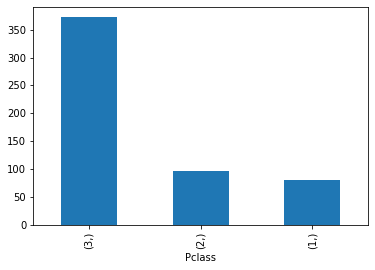

In [150]:
deadPclass.value_counts().plot(kind='bar')

## 나이에 따른 생존률 

In [154]:
survivedAge = df[df['Survived'] == 1][['Age']]
survivedAge.value_counts()[:10]

Age 
29.0    60
24.0    15
22.0    11
27.0    11
36.0    11
35.0    11
30.0    10
19.0     9
18.0     9
32.0     9
dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

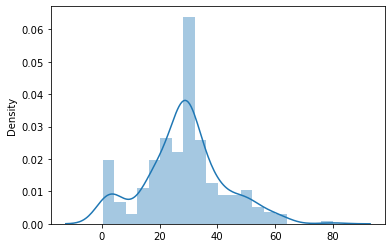

In [159]:
sns.distplot(survivedAge)

In [156]:
deadAge = df[df['Survived'] == 0][['Age']]
deadAge.value_counts()[:10]

Age 
29.0    137
21.0     19
28.0     18
25.0     17
18.0     17
22.0     16
19.0     16
30.0     15
24.0     15
20.0     12
dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

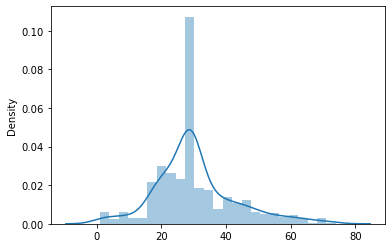

In [160]:
sns.distplot(deadAge)

## 타이타닉 호에 동승한 자매 / 배우자의 수에 따른 생존률

In [161]:
survivedSibSp = df[df['Survived'] == 1][['SibSp']]
survivedSibSp.value_counts()

SibSp
0        210
1        112
2         13
3          4
4          3
dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

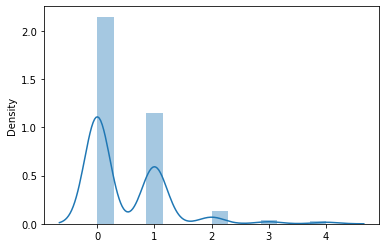

In [162]:
sns.distplot(survivedSibSp)

In [163]:
deadSibSp = df[df['Survived'] == 0][['SibSp']]
deadSibSp.value_counts()

SibSp
0        398
1         97
2         15
4         15
3         12
8          7
5          5
dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

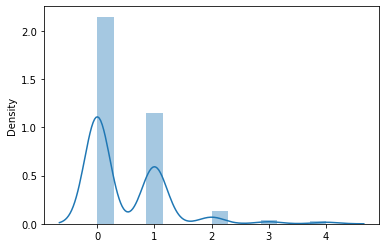

In [164]:
sns.distplot(survivedSibSp)

## 타이타닉 호에 동승한 부모 / 자식의 수에 따른 생존률

In [165]:
survivedParch = df[df['Survived'] == 1][['Parch']]
survivedParch.value_counts()

Parch
0        233
1         65
2         40
3          3
5          1
dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

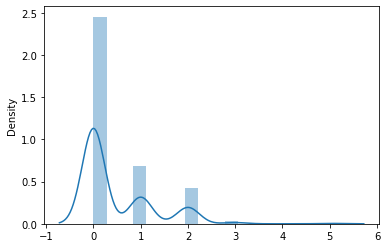

In [166]:
sns.distplot(survivedParch)

In [167]:
deadParch = df[df['Survived'] == 0][['Parch']]
deadParch.value_counts()

Parch
0        445
1         53
2         40
4          4
5          4
3          2
6          1
dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

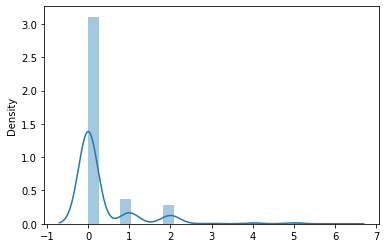

In [168]:
sns.distplot(deadParch)

## 승객 요금에 따른 생존률

In [172]:
fare = df[['Fare', 'Survived']]
fare.head()

,Fare,Survived
0,7.2500,0
1,71.2833,1
2,7.9250,1
3,53.1000,1
4,8.0500,0


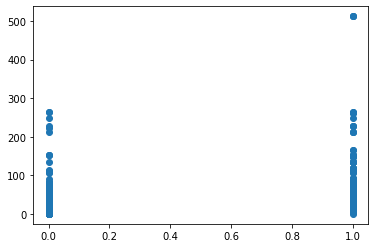

In [177]:
plt.scatter(df['Survived'],df['Fare'])
plt.show()

## 탑승지에 따른 생존률

In [181]:
S = df[df['S'] == 1]['Survived'].value_counts()
C = df[df['C'] == 1]['Survived'].value_counts()
Q = df[df['Q'] == 1]['Survived'].value_counts()

In [185]:
boardSurvived = pd.DataFrame([S, C, Q])
boardSurvived.index = ['S', 'C', 'Q']
boardSurvived.head()

,0,1
S,427,219
C,75,93
Q,47,30


<AxesSubplot:>

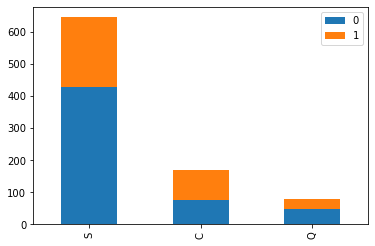

In [186]:
boardSurvived.plot(kind='bar', stacked=True)

## 탑승지와 좌석 등급에 따른 생존률

In [189]:
S = df[(df['S'] == 1) & (df['Survived'] == 1)]['Pclass'].value_counts()
C = df[(df['C'] == 1) & (df['Survived'] == 1)]['Pclass'].value_counts()
Q = df[(df['Q'] == 1) & (df['Survived'] == 1)]['Pclass'].value_counts()

In [190]:
boardSurvived = pd.DataFrame([S, C, Q])
boardSurvived.index = ['S', 'C', 'Q']
boardSurvived.head()

,1,2,3
S,76,76,67
C,59,9,25
Q,1,2,27


<AxesSubplot:>

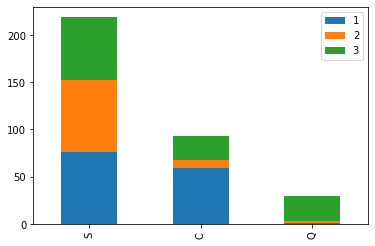

In [191]:
boardSurvived.plot(kind='bar', stacked=True)

In [192]:
S = df[(df['S'] == 1) & (df['Survived'] == 0)]['Pclass'].value_counts()
C = df[(df['C'] == 1) & (df['Survived'] == 0)]['Pclass'].value_counts()
Q = df[(df['Q'] == 1) & (df['Survived'] == 0)]['Pclass'].value_counts()

In [195]:
boardDead = pd.DataFrame([S, C, Q])
boardDead.index = ['S', 'C', 'Q']
boardDead.head()

,3,2,1
S,286,88,53
C,41,8,26
Q,45,1,1


<AxesSubplot:>

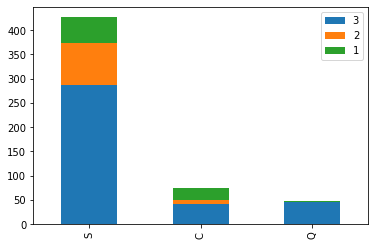

In [196]:
boardDead.plot(kind='bar', stacked=True)

## 나이대 별로 나눠보자

- 10대, 20대 ....

In [205]:
survivedAge = df[df['Survived'] == 1][['Age']]
survivedAge.head()

,Age
1,38.0
2,26.0
3,35.0
8,27.0
9,14.0


In [206]:
survivedAge = survivedAge - (survivedAge % 10)
survivedAge.head()

,Age
1,30.0
2,20.0
3,30.0
8,20.0
9,10.0


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

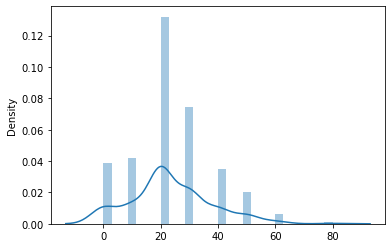

In [207]:
sns.distplot(survivedAge)

In [208]:
deadAge = df[df['Survived'] == 0][['Age']]
deadAge.head()

,Age
0,22.0
4,35.0
5,29.0
6,54.0
7,2.0


In [209]:
deadAge = deadAge - (deadAge % 10)
deadAge.head()

,Age
0,20.0
4,30.0
5,20.0
6,50.0
7,0.0


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

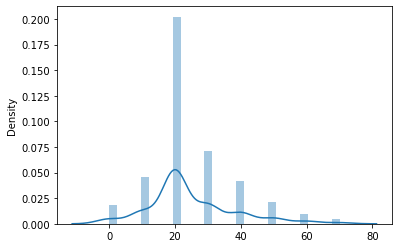

In [211]:
sns.distplot(deadAge)

## 가설!

- 같은 등급에서도 자리에 따라 티켓 가격이 달랐을 것 (비상구쪽, 전망 좋은 곳, 엔진소리 덜 나는 곳), 이 부분이 생존에 영향이 있었을까?

![titanic](https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w)

### 1등급의 경우

In [259]:
firstClassFare = df[(df['Pclass'] == 1)][['Fare', 'Survived']]
firstClassFare.head()

,Fare,Survived
1,71.2833,1
3,53.1000,1
6,51.8625,0
11,26.5500,1
23,35.5000,1


In [260]:
firstClassFare.describe()

,Fare,Survived
count,216.000000,216.000000
mean,84.154687,0.629630
std,78.380373,0.484026
min,0.000000,0.000000
25%,30.923950,0.000000
50%,60.287500,1.000000
75%,93.500000,1.000000
max,512.329200,1.000000


In [261]:
firstClassFare['Fare'] = firstClassFare['Fare'] - (firstClassFare['Fare'] % 10)
firstClassFare.head()

,Fare,Survived
1,70.0,1
3,50.0,1
6,50.0,0
11,20.0,1
23,30.0,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


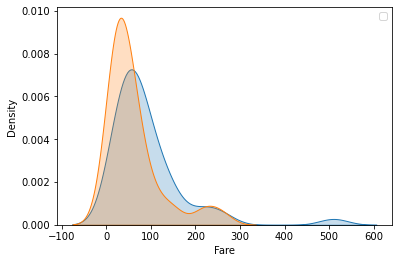

In [262]:
sns.kdeplot(firstClassFare[firstClassFare['Survived'] == 1]['Fare'], shade=True)
sns.kdeplot(firstClassFare[firstClassFare['Survived'] == 0]['Fare'], shade=True)

plt.legend()
plt.show()

## 2등급의 경우

In [255]:
secondClassFare = df[(df['Pclass'] == 2)][['Fare', 'Survived']]
secondClassFare.head()

,Fare,Survived
9,30.0708,1
15,16.0000,1
17,13.0000,1
20,26.0000,0
21,13.0000,1


In [256]:
secondClassFare.describe()

,Fare,Survived
count,184.000000,184.000000
mean,20.662183,0.472826
std,13.417399,0.500623
min,0.000000,0.000000
25%,13.000000,0.000000
50%,14.250000,0.000000
75%,26.000000,1.000000
max,73.500000,1.000000


In [257]:
secondClassFare['Fare'] = secondClassFare['Fare'] - (secondClassFare['Fare'] % 5)
secondClassFare.head()

,Fare,Survived
9,30.0,1
15,15.0,1
17,10.0,1
20,25.0,0
21,10.0,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


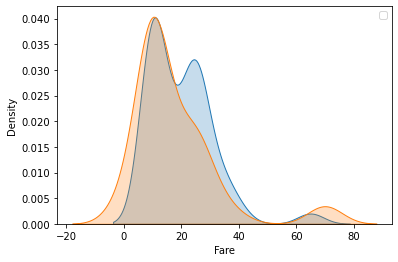

In [258]:
sns.kdeplot(secondClassFare[secondClassFare['Survived'] == 1]['Fare'], shade=True)
sns.kdeplot(secondClassFare[secondClassFare['Survived'] == 0]['Fare'], shade=True)

plt.legend()
plt.show()

## 3등급의 경우

In [267]:
thirdClassFare = df[(df['Pclass'] == 3)][['Fare', 'Survived']]
thirdClassFare.head()

,Fare,Survived
0,7.2500,0
2,7.9250,1
4,8.0500,0
5,8.4583,0
7,21.0750,0


In [268]:
thirdClassFare.describe()

,Fare,Survived
count,491.000000,491.000000
mean,13.675550,0.242363
std,11.778142,0.428949
min,0.000000,0.000000
25%,7.750000,0.000000
50%,8.050000,0.000000
75%,15.500000,0.000000
max,69.550000,1.000000


In [269]:
thirdClassFare['Fare'] = thirdClassFare['Fare'] - (thirdClassFare['Fare'] % 5)
thirdClassFare.head()

,Fare,Survived
0,5.0,0
2,5.0,1
4,5.0,0
5,5.0,0
7,20.0,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


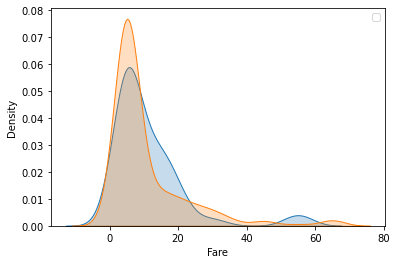

In [270]:
sns.kdeplot(thirdClassFare[thirdClassFare['Survived'] == 1]['Fare'], shade=True)
sns.kdeplot(thirdClassFare[thirdClassFare['Survived'] == 0]['Fare'], shade=True)

plt.legend()
plt.show()

도저히 모르겠다 3등급에서 어떤 부분이 의미가 있는지 상관계수로 확인해보자

In [280]:
thirdClass = df[(df['Pclass'] == 3)]

In [281]:
thirdClass['Fare'] = thirdClass['Fare'] - (thirdClass['Fare'] % 5)
thirdClass['Age'] = thirdClass['Age'] - (thirdClass['Age'] % 10)
thirdClass.head()

/tmp/ipykernel_30/1407799945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thirdClass['Fare'] = thirdClass['Fare'] - (thirdClass['Fare'] % 5)
/tmp/ipykernel_30/1407799945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thirdClass['Age'] = thirdClass['Age'] - (thirdClass['Age'] % 10)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,20.0,1,0,5.0,0,1,0,0,1
2,3,1,3,20.0,0,0,5.0,1,0,0,0,1
4,5,0,3,30.0,0,0,5.0,0,1,0,0,1
5,6,0,3,20.0,0,0,5.0,0,1,0,1,0
7,8,0,3,0.0,3,1,20.0,0,1,0,0,1


In [283]:
thirdClass.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, PassengerId to S
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  11 non-null     float64
 1   Survived     11 non-null     float64
 2   Pclass       0 non-null      float64
 3   Age          11 non-null     float64
 4   SibSp        11 non-null     float64
 5   Parch        11 non-null     float64
 6   Fare         11 non-null     float64
 7   female       11 non-null     float64
 8   male         11 non-null     float64
 9   C            11 non-null     float64
 10  Q            11 non-null     float64
 11  S            11 non-null     float64
dtypes: float64(12)
memory usage: 1.5+ KB


In [284]:
thirdClass = thirdClass.corr()
thirdClass

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
PassengerId,1.000000,-0.285777,NaN,0.118295,-0.258642,-0.230588,-0.218483,-0.273334,0.273334,0.008700,-0.085455,0.054065
Survived,-0.285777,1.000000,NaN,-0.365045,-0.080400,0.072571,-0.045771,0.676376,-0.676376,0.284381,0.333722,-0.419862
Pclass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,0.118295,-0.365045,NaN,1.000000,-0.609214,-0.488495,-0.545893,-0.382816,0.382816,-0.163928,-0.035124,0.132044
SibSp,-0.258642,-0.080400,NaN,-0.609214,1.000000,0.778767,0.956310,0.260718,-0.260718,-0.164969,-0.161080,0.220823
Parch,-0.230588,0.072571,NaN,-0.488495,0.778767,1.000000,0.847139,0.490358,-0.490358,-0.073043,-0.163411,0.162183
Fare,-0.218483,-0.045771,NaN,-0.545893,0.956310,0.847139,1.000000,0.277999,-0.277999,-0.179706,-0.195800,0.254768
female,-0.273334,0.676376,NaN,-0.382816,0.260718,0.490358,0.277999,1.000000,-1.000000,0.134448,0.289876,-0.290894
male,0.273334,-0.676376,NaN,0.382816,-0.260718,-0.490358,-0.277999,-1.000000,1.000000,-0.134448,-0.289876,0.290894
C,0.008700,0.284381,NaN,-0.163928,-0.164969,-0.073043,-0.179706,0.134448,-0.134448,1.000000,0.088265,-0.717375


<AxesSubplot:>

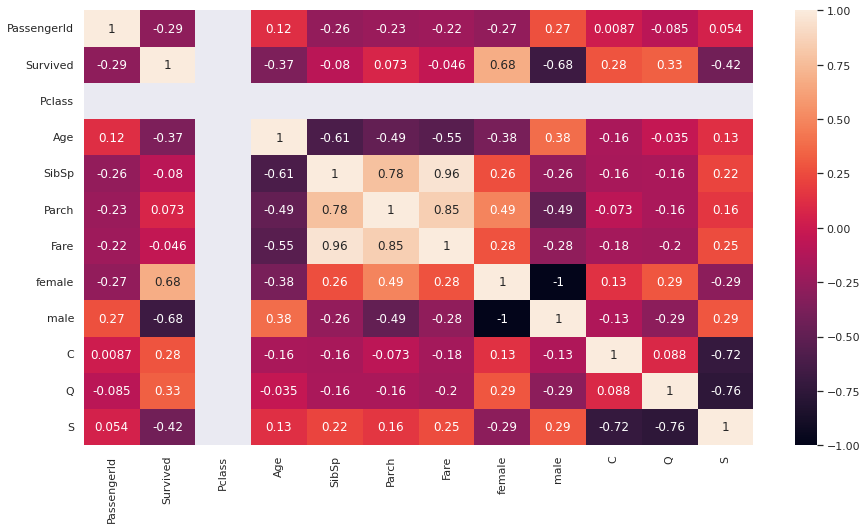

In [285]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(thirdClass, annot=True)

생존관련

- 여성이 양의 상관관계, 남성이 음의 상관관계를 가짐
- Southampton항구에서 탑승한 승객이 음의 상관관계
- Age가 음의 상관관계
- Queenstown 항구에서 탑승한 승객이 양의 상관관계를 가짐

그럼 여기서 의문

배가 거쳐간 경로에 따라서 좌석에 영향이 있었고 늦게 탄사람은 일찍 탈출 가능한 자리를 배정받은걸까?

![asdf](https://mblogthumb-phinf.pstatic.net/20121130_191/gumdansan21_1354201661570zbA8S_PNG/%C5%B8%C0%CC%C5%B8%B4%D0_Titanic_voyage_map.png?type=w2)

경로를 보면 `Southampton` -> `Cherbourn` -> `Queenstown` -> `New York` 로 이동했음을 알 수 있음



In [290]:
S = df[(df['S'] == 1) & (df['Pclass'] == 3)]['Survived'].value_counts()
C = df[(df['C'] == 1) & (df['Pclass'] == 3)]['Survived'].value_counts()
Q = df[(df['Q'] == 1) & (df['Pclass'] == 3)]['Survived'].value_counts()

In [291]:
boardSurvived = pd.DataFrame([S, C, Q])
boardSurvived.index = ['S', 'C', 'Q']
boardSurvived.head()

,0,1
S,286,67
C,41,25
Q,45,27


<AxesSubplot:>

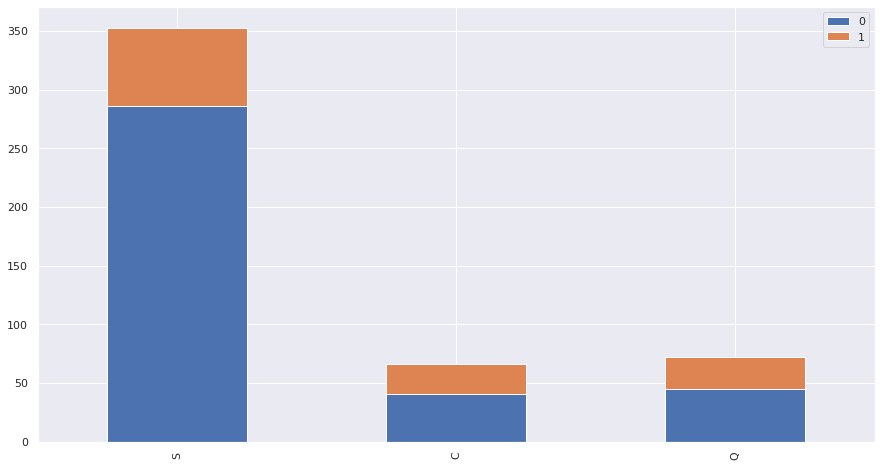

In [293]:
boardSurvived.plot(kind='bar', stacked=True)

## 전체 데이터를 기준으로 보면 어떨까?

In [287]:
dfModify = df.copy()
dfModify['Fare'] = dfModify['Fare'] - (dfModify['Fare'] % 5)
dfModify['Age'] = dfModify['Age'] - (dfModify['Age'] % 10)

dfCorr = dfModify.corr()
dfCorr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
PassengerId,1.000000,-0.005007,-0.035144,0.037231,-0.057527,-0.001652,0.011707,-0.042939,0.042939,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,-0.050972,-0.035322,0.081629,0.259978,0.543351,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.339610,0.083081,0.018443,-0.555016,-0.131900,0.131900,-0.243292,0.221009,0.074053
Age,0.037231,-0.050972,-0.339610,1.000000,-0.226973,-0.158376,0.101038,-0.074794,0.074794,0.030254,-0.063081,0.013193
SibSp,-0.057527,-0.035322,0.083081,-0.226973,1.000000,0.414838,0.157399,0.114631,-0.114631,-0.059528,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,-0.158376,0.414838,1.000000,0.215921,0.245489,-0.245489,-0.011069,-0.081228,0.060814
Fare,0.011707,0.259978,-0.555016,0.101038,0.157399,0.215921,1.000000,0.181939,-0.181939,0.267637,-0.118135,-0.160119
female,-0.042939,0.543351,-0.131900,-0.074794,0.114631,0.245489,0.181939,1.000000,-1.000000,0.082853,0.074115,-0.119224
male,0.042939,-0.543351,0.131900,0.074794,-0.114631,-0.245489,-0.181939,-1.000000,1.000000,-0.082853,-0.074115,0.119224
C,-0.001205,0.168240,-0.243292,0.030254,-0.059528,-0.011069,0.267637,0.082853,-0.082853,1.000000,-0.148258,-0.782742


<AxesSubplot:>

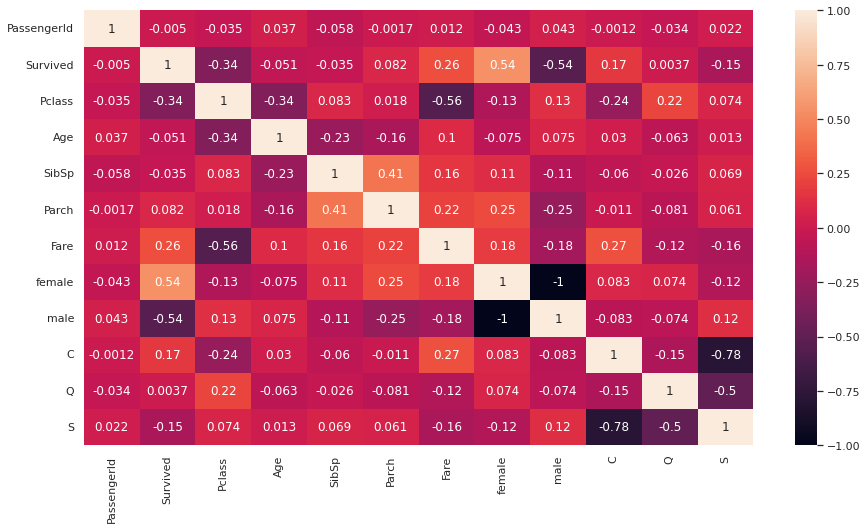

In [289]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(dfCorr, annot=True)

In [294]:
S = df[(df['S'] == 1)]['Survived'].value_counts()
C = df[(df['C'] == 1)]['Survived'].value_counts()
Q = df[(df['Q'] == 1)]['Survived'].value_counts()

In [295]:
boardSurvived = pd.DataFrame([S, C, Q])
boardSurvived.index = ['S', 'C', 'Q']
boardSurvived.head()

,0,1
S,427,219
C,75,93
Q,47,30


<AxesSubplot:>

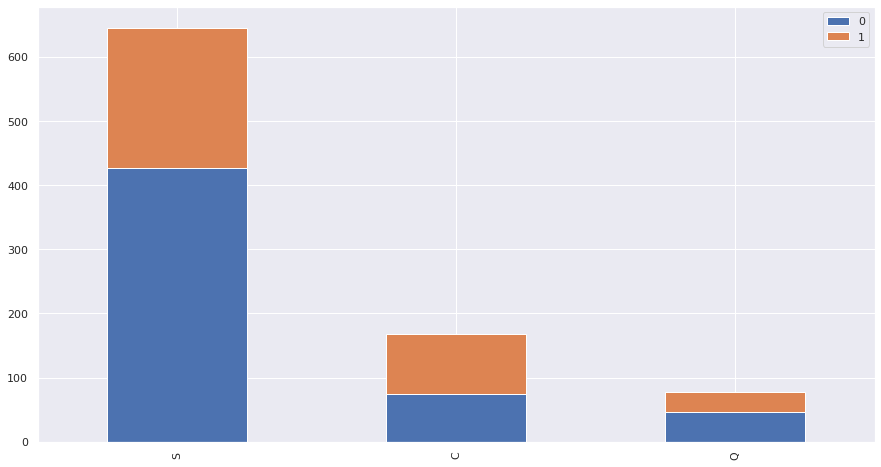

In [296]:
boardSurvived.plot(kind='bar', stacked=True)

좀 알아보기 힘든데 등급별로 나누어 볼까?

## 2등급

In [297]:
S = df[(df['S'] == 1) & (df['Pclass'] == 2)]['Survived'].value_counts()
C = df[(df['C'] == 1) & (df['Pclass'] == 2)]['Survived'].value_counts()
Q = df[(df['Q'] == 1) & (df['Pclass'] == 2)]['Survived'].value_counts()

In [298]:
boardSurvived = pd.DataFrame([S, C, Q])
boardSurvived.index = ['S', 'C', 'Q']
boardSurvived.head()

,0,1
S,88,76
C,8,9
Q,1,2


<AxesSubplot:>

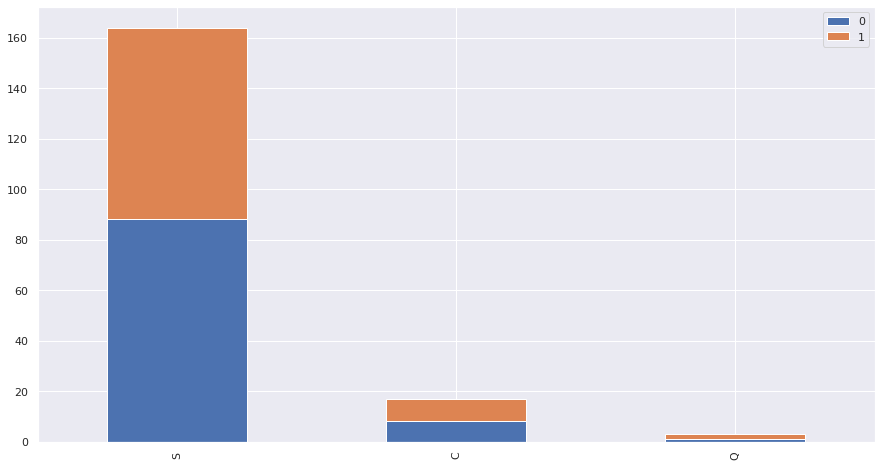

In [299]:
boardSurvived.plot(kind='bar', stacked=True)

## 1등급

In [300]:
S = df[(df['S'] == 1) & (df['Pclass'] == 1)]['Survived'].value_counts()
C = df[(df['C'] == 1) & (df['Pclass'] == 1)]['Survived'].value_counts()
Q = df[(df['Q'] == 1) & (df['Pclass'] == 1)]['Survived'].value_counts()

In [310]:
boardSurvived = pd.DataFrame([S, C, Q])
boardSurvived = boardSurvived[[0, 1]]
boardSurvived.index = ['S', 'C', 'Q']
boardSurvived.head()

,0,1
S,53,76
C,26,59
Q,1,1


<AxesSubplot:>

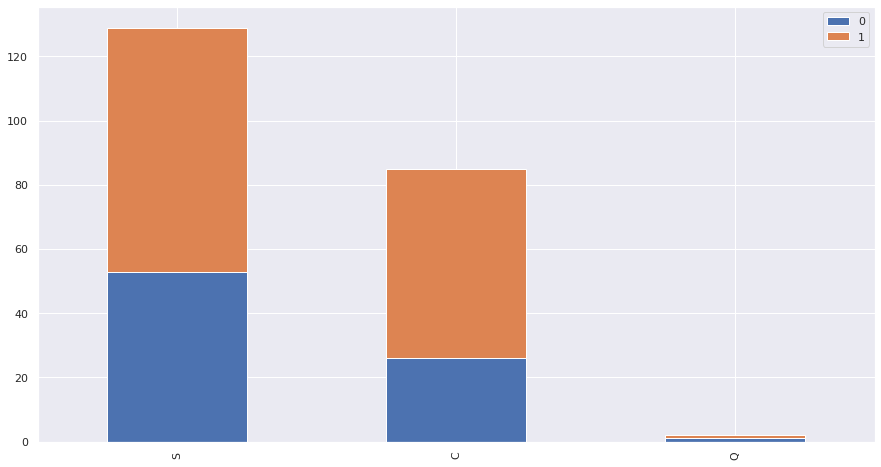

In [311]:
boardSurvived.plot(kind='bar', stacked=True)

## Summary

- 1등급은 어디서 탔어도 50% 이상의 생존률을 보임
- 2등급은 어디서 탔어도 50% 내외의 비슷비슷한 생존률을 보임
- 3등급은 Southampton항구에서 탄 사람들이 대부분 사망

## kaggle 채점 요청

In [3]:
!kaggle competitions submit -c titanic -f gender_submission.csv -m "Subtit with Kaggle API"

100%|████████████████████████████████████████| 3.18k/3.18k [00:03<00:00, 822B/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [17]:
#!pip3 list --format=freeze